In [2]:
# imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read the cleaned data
df = pd.read_csv("/Users/mz/Documents/GitHub_Projects/SalaryPredProject/2_Data_Cleaning/glassdoor_jobs_cleaned.csv")
display(df.tail())

/Users/mz/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
/Users/mz/Softwares/Anaconda/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,title,salary,description,rating,company,location,size,founded,ownership,industry,...,estimate_by_employer,min_salary,max_salary,avg_salary,state,age,aws,sql,sas,python
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,...,0,58,111,84.5,MA,192,1,0,0,0
738,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN",1001 to 5000 employees,2006,Company - Public,Internet,...,0,72,133,102.5,TN,16,1,1,0,1
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,...,0,56,91,73.5,PA,38,0,0,0,0
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,...,0,95,160,127.5,PA,2023,0,0,0,0
741,Research Scientist – Security and Privacy,61-126,Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute,"Beavercreek, OH",501 to 1000 employees,1967,Nonprofit Organization,Federal Agencies,...,0,61,126,93.5,OH,55,0,0,0,1


In [3]:
# Feature Engineering Functions
def get_job_category(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"

def get_job_level(title):
    senior_titles = ['senior', 'sr', 'sr.', 'principal', 'lead']
    junior_titles = ['jr', 'jr.', 'junior']

    if any([True if s in title.lower() else False for s in senior_titles]):
        return 'senior'
    elif any([True if j in title.lower() else False for j in junior_titles]):
        return 'junior'
    else:
        return 'na'
     
# Visualization functions
def plot_hist(df, columns, figsize = (8,16)):
    n_plots = len(columns)
    fig, axs = plt.subplots(n_plots, figsize=figsize)
    for i, col in enumerate(columns):
        df[col].hist(ax = axs[i])
        axs[i].set_title(col)
        
    fig.tight_layout()
    plt.show()

def plot_boxplot(df, columns, figsize = (8,16)):
    n_plots = len(columns)
    fig, axs = plt.subplots(n_plots, figsize=figsize)
    for i, col in enumerate(columns):
        df.boxplot(column = col, ax = axs[i])
        axs[i].set_title(col)
        
    fig.tight_layout()
    plt.show()

def plot_barplot(df, columns, figsize=(6,4)):
    '''
    plots the number of data points for each class of all given categorical features
    '''
    for i, col in enumerate(columns):
        fig, ax = plt.subplots(1, figsize=figsize)
        category_counts = df[col].value_counts()
        category_classes = df[col].value_counts().index

        ax = sns.barplot(x=category_classes, y=category_counts)
                 
        ax.set_title(f"{col} (# of classes: {len(category_classes)})")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()
        

In [5]:
# Get the category of each position
df['job_cat'] = df.title.apply(get_job_category)
display(df.job_cat.value_counts())

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_cat, dtype: int64

In [6]:
# Get the seniority of each position
df['job_level'] = df.title.apply(get_job_level)
display(df.job_level.value_counts())

na        519
senior    220
junior      3
Name: job_level, dtype: int64

In [7]:
# Fix Los Angeles state 
df['state'] = df.state.apply(lambda x: x.strip() if x.lower != 'los angeles' else 'CA')
# df.state.value_counts()

In [8]:
# Add length of description
df['description_len'] = df.description.apply(lambda x: len(x))

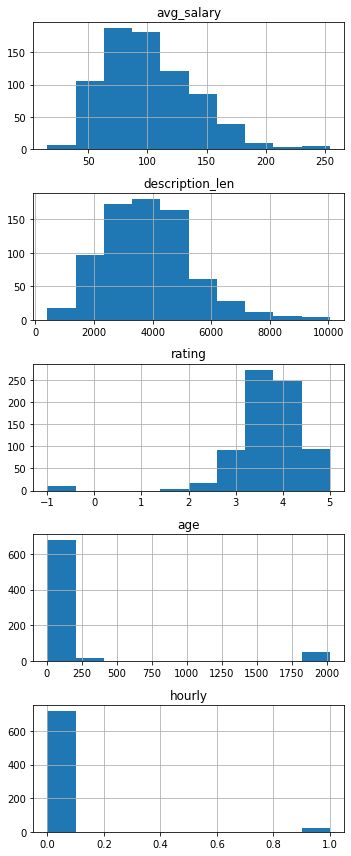

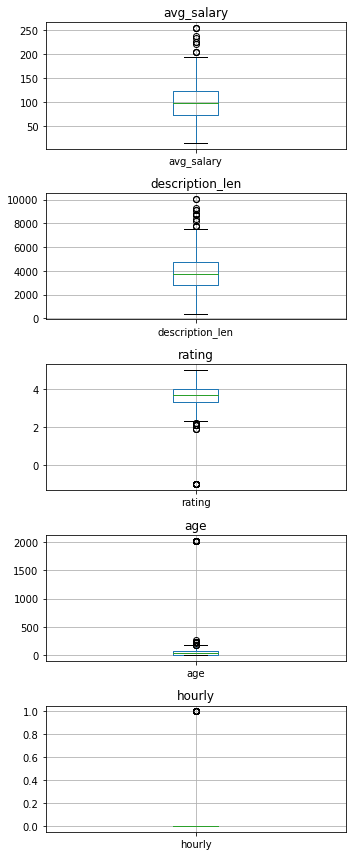

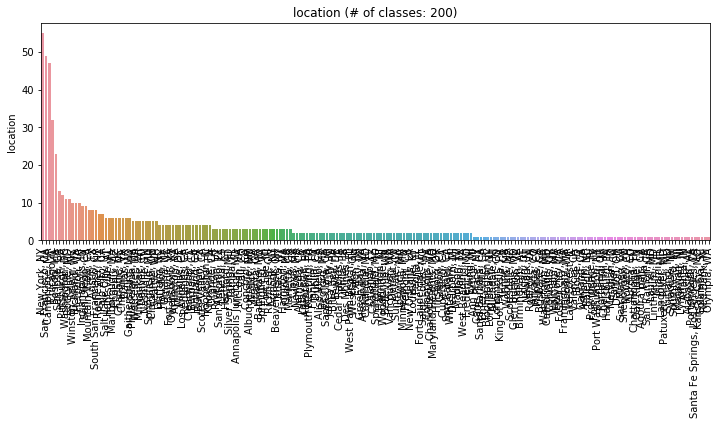

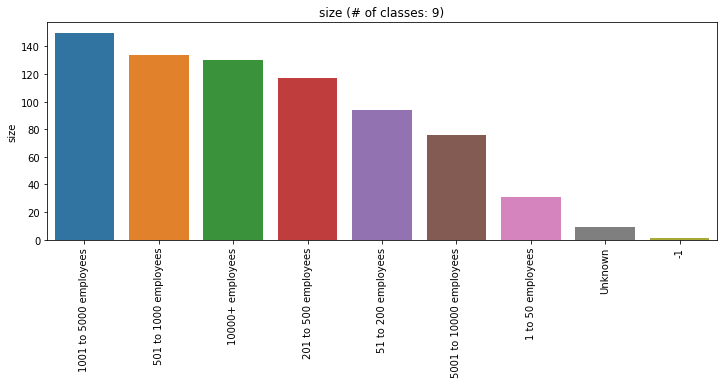

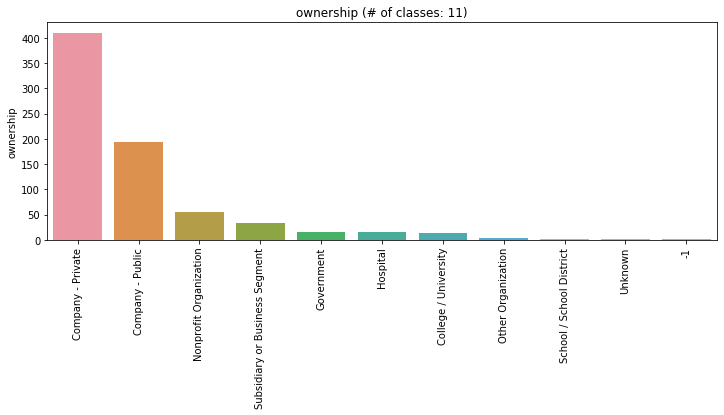

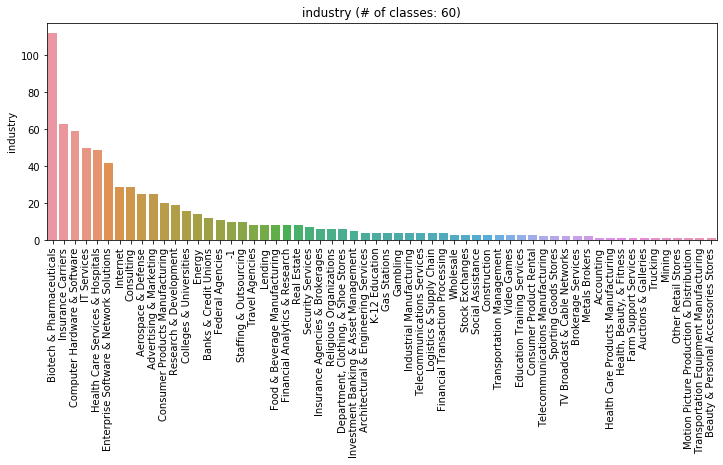

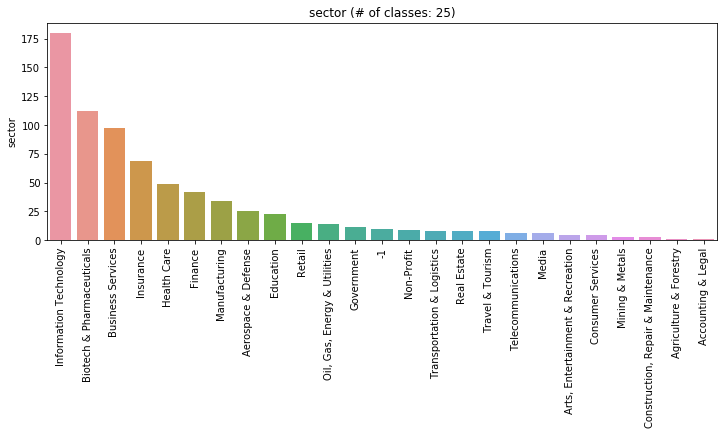

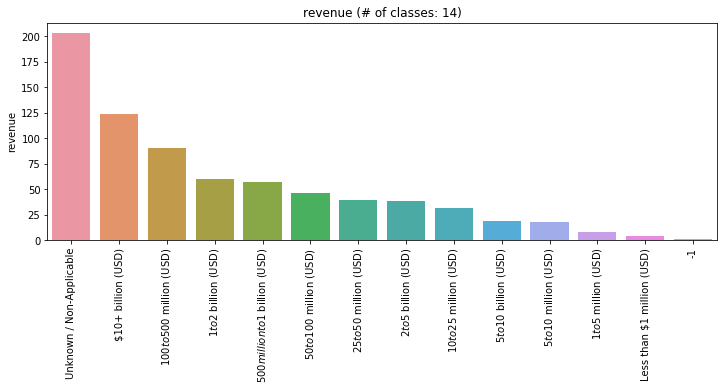

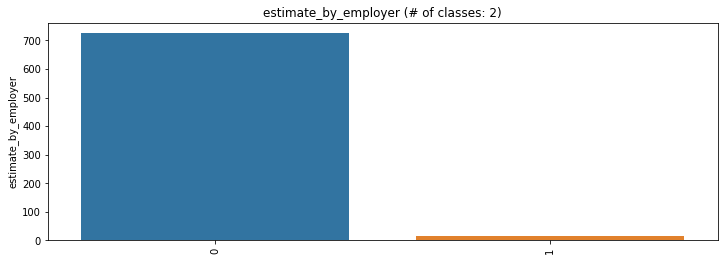

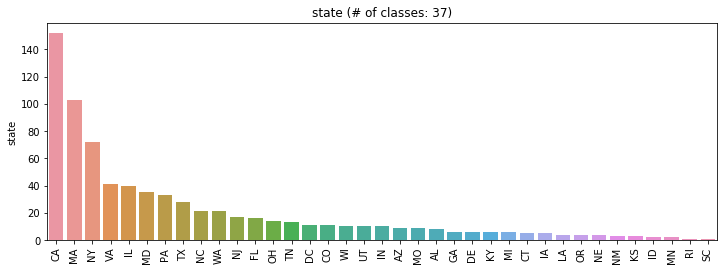

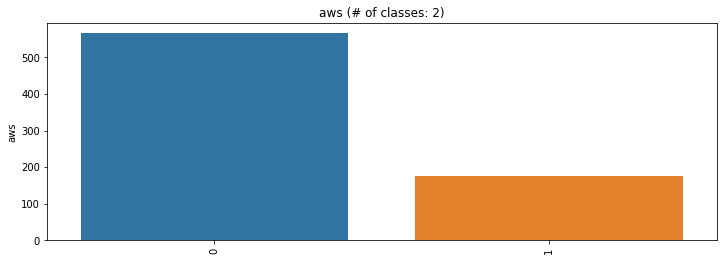

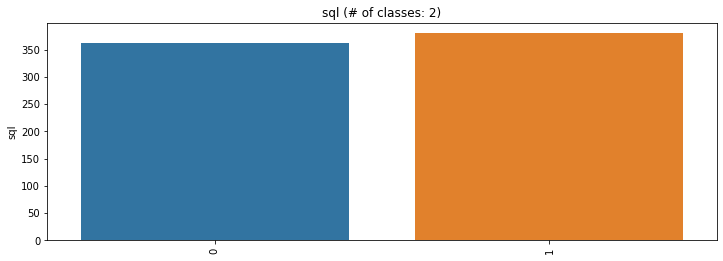

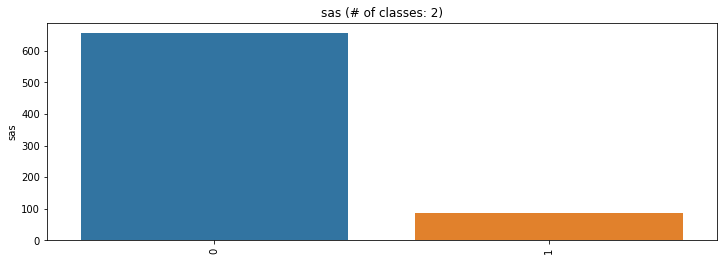

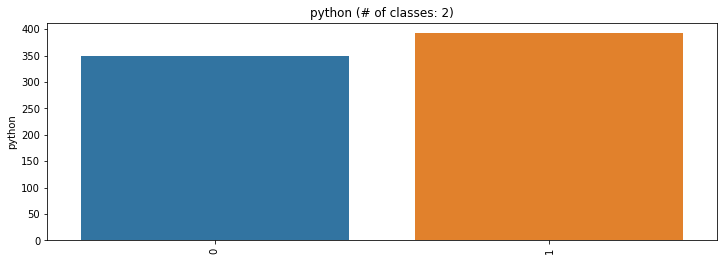

In [7]:
plot_hist(df, columns=['avg_salary', 'description_len', 'rating', 'age', 'hourly'],
            figsize=(5,12))
plot_boxplot(df, columns=['avg_salary', 'description_len', 'rating', 'age', 'hourly'],
            figsize=(5,12))
plot_barplot(df, columns=['location', 'size', 'ownership', 'industry', 'sector', 'revenue',
                            'estimate_by_employer', 'state','aws', 'sql', 'sas', 'python'],
            figsize=(12,4))

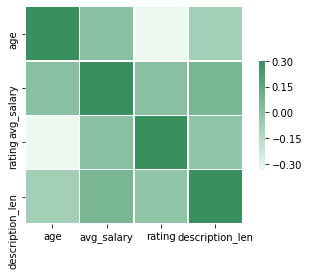

In [21]:
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['age','avg_salary','rating','description_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df.pivot_table(index=['job_cat'], 
                values=['avg_salary'], 
                aggfunc=['count', 'min', 'mean', 'max'])

,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
job_cat,,,,
analyst,102,28.5,66.151961,173.0
data engineer,119,58.5,105.403361,205.0
data scientist,279,15.5,117.564516,237.5
director,14,53.0,168.607143,254.0
manager,22,40.5,84.022727,221.5
mle,22,87.0,126.431818,232.5
na,184,39.5,88.627717,174.0


In [9]:
cat_features = ['rating', 'company', 'location', 'size',
                'founded', 'ownership', 'industry', 'sector', 'revenue',
                'hourly', 'estimate_by_employer', 'state', 'age', 
                'aws', 'sql', 'sas', 'python', 'job_cat', 'job_level',]
for col in cat_features:
    display(df.pivot_table(index=col, 
                    values='avg_salary', 
                    aggfunc=['count', 'min', 'mean', 'max']).sort_values(( 'mean', 'avg_salary'), ascending=False))

,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
rating,,,,
-1.0,11,87.5,136.181818,225.0
5.0,5,101.0,134.700000,155.0
2.5,2,96.5,120.000000,143.5
4.5,7,48.0,117.714286,157.0
4.1,19,61.0,116.368421,205.0
3.9,63,15.5,113.071429,181.0
2.6,12,73.5,109.083333,124.0
4.4,33,53.5,108.606061,172.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
company,,,,
Gallup,1,237.5,237.5,237.5
Sage Intacct,1,232.5,232.5,232.5
CA-One Tech Cloud,2,225.0,225.0,225.0
Grand Rounds,1,221.5,221.5,221.5
Credit Sesame,3,205.0,205.0,205.0
...,...,...,...,...
Alliance Source Testing,1,39.5,39.5,39.5
Greenway Health,2,37.5,37.5,37.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
location,,,,
"Bellevue, WA",2,184.5,184.5000,184.5
"Lake Forest, IL",1,179.5,179.5000,179.5
"Mountain View, CA",8,150.5,177.1875,205.0
"Novato, CA",1,168.0,168.0000,168.0
"Burbank, CA",4,148.0,164.0000,180.0
...,...,...,...,...
"Cedar Rapids, IA",2,43.0,43.0000,43.0
"Kansas City, MO",1,40.5,40.5000,40.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
size,,,,
Unknown,9,110.5,128.111111,155.0
-1,1,117.5,117.500000,117.5
10000+ employees,130,42.5,112.888462,254.0
51 to 200 employees,94,39.5,111.781915,225.0
1 to 50 employees,31,64.0,105.935484,169.0
201 to 500 employees,117,44.0,100.247863,181.0
5001 to 10000 employees,76,28.5,97.618421,164.0
1001 to 5000 employees,150,15.5,94.896667,237.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
founded,,,,
1927,1,179.5,179.500000,179.5
2009,6,140.0,156.000000,180.0
1912,10,51.5,153.600000,254.0
1970,3,98.5,147.166667,171.5
1962,2,139.0,139.000000,139.0
...,...,...,...,...
1883,1,50.0,50.000000,50.0
1986,6,29.5,47.583333,62.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
ownership,,,,
-1,1,117.5,117.500000,117.5
Company - Public,193,28.5,111.049223,184.5
Subsidiary or Business Segment,34,37.5,110.573529,232.5
College / University,13,73.5,107.615385,124.0
Company - Private,410,15.5,102.150000,254.0
Government,15,42.5,85.800000,120.0
School / School District,2,59.5,77.750000,96.0
Other Organization,3,72.5,77.500000,87.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
industry,,,,
Other Retail Stores,1,163.5,163.500000,163.5
Motion Picture Production & Distribution,1,146.0,146.000000,146.0
Financial Analytics & Research,8,85.0,145.125000,180.0
"Health, Beauty, & Fitness",1,139.5,139.500000,139.5
Telecommunications Services,4,121.0,131.500000,142.0
Brokerage Services,2,85.0,129.000000,173.0
Auctions & Galleries,1,128.0,128.000000,128.0
Internet,29,47.0,123.810345,205.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
sector,,,,
Media,6,92.5,116.666667,146.0
-1,10,87.5,114.650000,132.5
Accounting & Legal,1,113.5,113.500000,113.5
Information Technology,180,29.5,113.191667,232.5
Biotech & Pharmaceuticals,112,62.0,112.129464,174.0
Insurance,69,45.5,105.942029,254.0
Real Estate,8,92.5,104.750000,130.0
Mining & Metals,3,98.0,104.000000,107.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
revenue,,,,
$5 to $10 million (USD),18,74.0,126.111111,225.0
$1 to $5 million (USD),8,94.5,119.312500,140.5
-1,1,117.5,117.500000,117.5
$10+ billion (USD),124,51.5,115.673387,254.0
Less than $1 million (USD),4,98.5,108.625000,113.5
Unknown / Non-Applicable,203,40.5,105.226601,237.5
$1 to $2 billion (USD),60,60.0,104.533333,173.0
$50 to $100 million (USD),46,44.0,102.913043,205.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
hourly,,,,
0,718,15.5,103.1539,254.0
1,24,28.5,55.1875,77.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
estimate_by_employer,,,,
1,17,64.0,126.588235,225.0
0,725,15.5,101.016552,254.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
state,,,,
CA,152,47.5,123.513158,232.5
IL,40,52.5,116.662500,254.0
DC,11,50.0,110.181818,237.5
MA,103,47.5,107.766990,172.0
NJ,17,56.5,104.558824,173.0
MI,6,87.5,100.250000,130.0
RI,1,100.0,100.000000,100.0
NY,72,15.5,98.652778,172.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
age,,,,
95,1,179.5,179.500000,179.5
13,6,140.0,156.000000,180.0
110,10,51.5,153.600000,254.0
52,3,98.5,147.166667,171.5
60,2,139.0,139.000000,139.0
...,...,...,...,...
139,1,50.0,50.000000,50.0
36,6,29.5,47.583333,62.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
aws,,,,
1,176,40.5,113.173295,225.0
0,566,15.5,98.004417,254.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
sql,,,,
0,362,15.5,101.649171,254.0
1,380,37.5,101.557895,232.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
sas,,,,
1,87,42.5,105.833333,254.0
0,655,15.5,101.040458,237.5


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
python,,,,
1,392,40.5,112.653061,254.0
0,350,15.5,89.225714,194.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
job_cat,,,,
director,14,53.0,168.607143,254.0
mle,22,87.0,126.431818,232.5
data scientist,279,15.5,117.564516,237.5
data engineer,119,58.5,105.403361,205.0
na,184,39.5,88.627717,174.0
manager,22,40.5,84.022727,221.5
analyst,102,28.5,66.151961,173.0


,count,min,mean,max
,avg_salary,avg_salary,avg_salary,avg_salary
job_level,,,,
senior,220,28.5,121.700000,237.5
na,519,15.5,93.260116,254.0
junior,3,50.0,71.000000,106.5


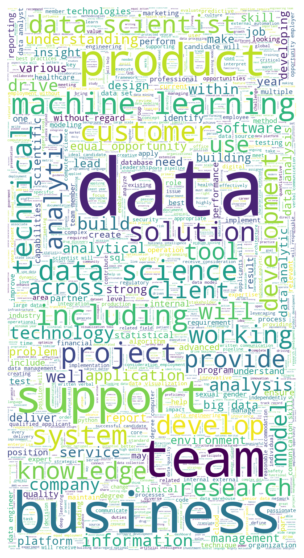

In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from stop_words import get_stop_words

words = " ".join(df['description'])



def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(get_stop_words('english'))
    stop_words.update(['experience','ability', 'work', 'using', 'based', 'new'])
    for w in text.split(" "):
        if w.lower() not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
